# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [149]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from scipy.stats import linregress
from datetime import datetime

# Import API Key
from api_keys import weather_api_key

# Output File (CSV)
output_data = os.path.join("output_data", "cities.csv")

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
latRange = (-90, 90)
longRange = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat/longs and cities
locations = []
cities = []

# Create a set of random location combinations
#lats = np.random.uniform(latRange[0], latRange[1], size=1500)
#longs = np.random.uniform(longRange[0], longRange[0], size=1500)
#locations = zip(lats, longs)

# Create a set of random location combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
locations = zip(lats, longs)

# Identify nearest city or each location combination
for locations in locations:
    city = citipy.nearest_city(locations[0], locations[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Create URL and determine units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
#units = input('Would you like the result in (imperial) or (metric) units? ')

print('Beginning Data Retrieval')
print('------------------------')

# Define empty lists to store values
cityName = []
country = []
date = []
maxTemp = []
cloudiness = []
windSpeed = []
humidity = []
latitude = []
longitude = []

# Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city = city
    queryURL = url + 'APPID=' + weather_api_key + '&q=' + city
    response = requests.get(queryURL).json()
    
# Error handling
    try:
        cityName.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        maxTemp.append(response["main"]['temp_max'])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        humidity.append(response["main"]['humidity'])
        latitude.append(response["coord"]["lat"])  
        longitude.append(response["coord"]["lon"])

        print(f"Processing record {i} | {city.title()}")
        i+=1
    except (KeyError):
        print("Data not found. Skipping.")
        
print ('------------------------')
print ('Data Retrieval Complete')
print ('------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 | Saskylakh
Processing record 2 | Iquique
Processing record 3 | Qaanaaq
Processing record 4 | Atuona
Processing record 5 | Butaritari
Processing record 6 | Rikitea
Processing record 7 | Mataura
Processing record 8 | Lavrentiya
Processing record 9 | Kapaa
Data not found. Skipping.
Processing record 10 | Khatanga
Processing record 11 | Shieli
Processing record 12 | Saint-Philippe
Processing record 13 | Busselton
Processing record 14 | College
Processing record 15 | Talnakh
Processing record 16 | Kodiak
Data not found. Skipping.
Processing record 17 | Nova Vicosa
Processing record 18 | Tiksi
Processing record 19 | Rapid Valley
Processing record 20 | Ushuaia
Processing record 21 | Iqaluit
Data not found. Skipping.
Processing record 22 | Saint-Joseph
Processing record 23 | Vardo
Processing record 24 | Manzhouli
Processing record 25 | Dera Ghazi Khan
Processing record 26 | Adrar
Processing record 27 | Dikson
Processing rec

Processing record 230 | Reshetylivka
Processing record 231 | Paraiso
Processing record 232 | Bambous Virieux
Processing record 233 | Byron Bay
Processing record 234 | Palana
Processing record 235 | Anqiu
Processing record 236 | Thompson
Processing record 237 | Labuhan
Processing record 238 | Danilov
Processing record 239 | Aqtobe
Processing record 240 | Lerwick
Processing record 241 | Mamlyutka
Processing record 242 | Chicama
Processing record 243 | Ribeira Grande
Processing record 244 | Broken Hill
Processing record 245 | Kewanee
Processing record 246 | Abu Zabad
Processing record 247 | Luderitz
Processing record 248 | Milkovo
Processing record 249 | Pafos
Processing record 250 | Clarence Town
Processing record 251 | Awjilah
Processing record 252 | Grandola
Processing record 253 | Talaya
Processing record 254 | Lander
Processing record 255 | Karratha
Processing record 256 | Strassen
Processing record 257 | Muhos
Processing record 258 | Lebork
Data not found. Skipping.
Processing recor

Processing record 465 | Anshun
Processing record 466 | Jieshi
Processing record 467 | Marquette
Processing record 468 | Kahului
Processing record 469 | Kota Kinabalu
Processing record 470 | Machali
Processing record 471 | Challapata
Processing record 472 | Jadu
Processing record 473 | Half Moon Bay
Processing record 474 | Mahudha
Processing record 475 | Dali
Processing record 476 | Pochutla
Processing record 477 | Escanaba
Processing record 478 | Roswell
Processing record 479 | Macenta
Processing record 480 | Sibu
Processing record 481 | Sotnikovo
Processing record 482 | Beringovskiy
Processing record 483 | Belmonte
Processing record 484 | Pimentel
Processing record 485 | Ahtopol
Processing record 486 | Keetmanshoop
Processing record 487 | Punta Cardon
Processing record 488 | Asyut
Processing record 489 | Oussouye
Processing record 490 | Liwale
Processing record 491 | Tommot
Processing record 492 | Weligama
Processing record 493 | Danville
Processing record 494 | Coihaique
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Creating city DF
citiesDF = pd.DataFrame({"City": cityName, "Country": country, "Date": date, "Max Temp": maxTemp, "Cloudiness": cloudiness, "Wind Speed": windSpeed, "Humidity": humidity, "Latitude": latitude, "Longitude": longitude})

# Output File (CSV)
citiesDF.to_csv("output_data/cities.csv")

# Print DF
citiesDF.head(10)

,City,Country,Date,Max Temp,Cloudiness,Wind Speed,Humidity,Latitude,Longitude
0,Saskylakh,RU,1619474685,2.98,97,4.52,97,71.9167,114.0833
1,Iquique,CL,1619474447,68.00,0,12.66,68,-20.2208,-70.1431
2,Qaanaaq,GL,1619474685,39.36,92,7.27,70,77.4840,-69.3632
3,Atuona,PF,1619474685,79.72,73,15.32,76,-9.8000,-139.0333
4,Butaritari,KI,1619474686,83.32,90,12.93,75,3.0707,172.7902
5,Rikitea,PF,1619474440,77.58,74,8.68,74,-23.1203,-134.9692
6,Mataura,NZ,1619474686,44.01,98,5.01,85,-46.1927,168.8643
7,Lavrentiya,RU,1619474439,31.51,99,2.37,83,65.5833,-171.0000
8,Kapaa,US,1619474686,78.80,1,12.66,65,22.0752,-159.3190
9,Khatanga,RU,1619474687,18.41,100,14.41,88,71.9667,102.5000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

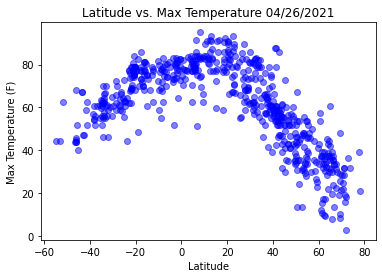

In [45]:
# Converting date
date = time.strftime('%m/%d/%Y')

# Creating plot
plt.scatter(citiesDF["Latitude"], citiesDF["Max Temp"], marker = "o", color = "blue", alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs. Max Temperature " + date)
plt.savefig("output_data/Lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

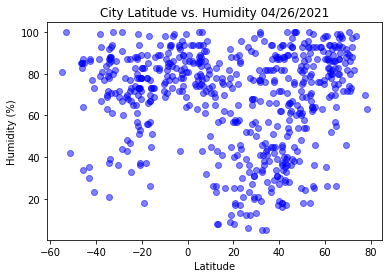

In [52]:
# Creating plot
plt.scatter(citiesDF["Latitude"], citiesDF["Humidity"], marker = "o", color = "blue", alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity " + date)
plt.savefig("output_data/Lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

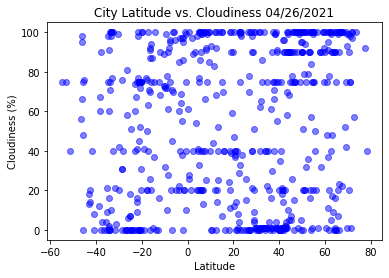

In [54]:
plt.scatter(citiesDF["Latitude"], citiesDF["Cloudiness"], marker = "o", color = "blue", alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness " + date)
plt.savefig("output_data/Lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

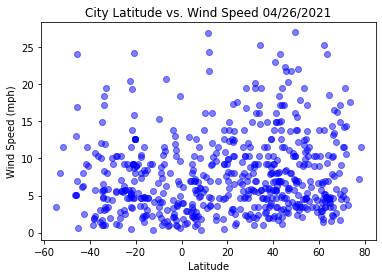

In [55]:
plt.scatter(citiesDF["Latitude"], citiesDF["Wind Speed"], marker = "o", color = "blue", alpha = .5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed " + date)
plt.savefig("output_data/Lat_vs_windspeed.png")
plt.show()

## Linear Regression
* Run a linear regression on each relationship.
* Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degres latitude)

In [132]:
def plotLinearRegression(xValues,yValues):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
    regressValues = xValues * slope + intercept
    lineEQ = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
   
    plt.scatter(xValues,yValues)
    plt.plot(xValues,regressValues,"r-")
    plt.annotate(lineEQ, (xValues.median(), yValues.median()), fontsize=15, color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    
# tried to change the label positioning here and got stuck, will come back to this later

In [141]:
# Create Northern and Southern Hemisphere DF

NorthernHemisphere = citiesDF.loc[citiesDF["Latitude"]>0]
SouthernHemisphere = citiesDF.loc[citiesDF["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8578608262884796


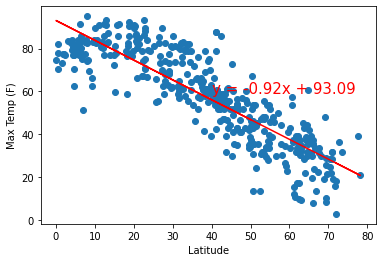

None


In [142]:
xValues = NorthernHemisphere["Latitude"]
yValues = NorthernHemisphere["Max Temp"]
#labelPos = (10, 20)
plt.ylabel("Max Temp (F)")
print(plotLinearRegression(xValues, yValues))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7248370115016365


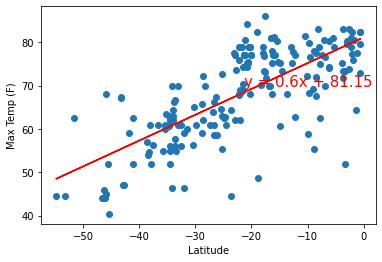

None


In [143]:
xValues = SouthernHemisphere["Latitude"]
yValues = SouthernHemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(plotLinearRegression(xValues, yValues))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17899760119128863


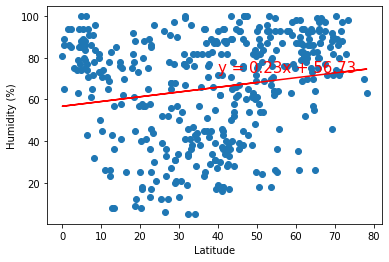

None


In [144]:
xValues = NorthernHemisphere["Latitude"]
yValues = NorthernHemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(plotLinearRegression(xValues, yValues))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.17442889223793878


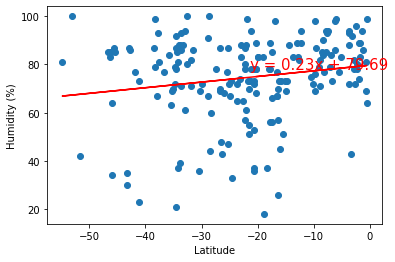

None


In [145]:
xValues = SouthernHemisphere["Latitude"]
yValues = SouthernHemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(plotLinearRegression(xValues, yValues))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11475113697969322


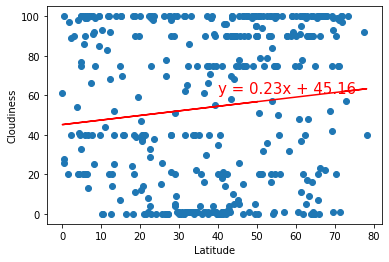

None


In [146]:
xValues = NorthernHemisphere["Latitude"]
yValues = NorthernHemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(plotLinearRegression(xValues, yValues))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1914561000711082


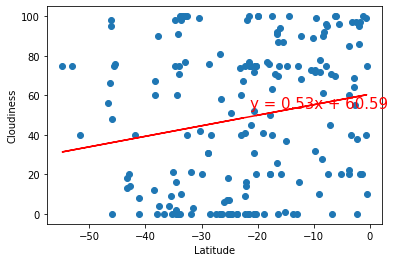

None


In [147]:
xValues = SouthernHemisphere["Latitude"]
yValues = SouthernHemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(plotLinearRegression(xValues, yValues))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10205586995895616


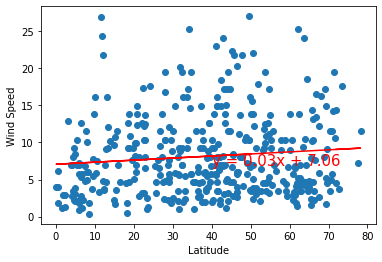

None


In [148]:
xValues = NorthernHemisphere["Latitude"]
yValues = NorthernHemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(plotLinearRegression(xValues, yValues))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.08153118848668504


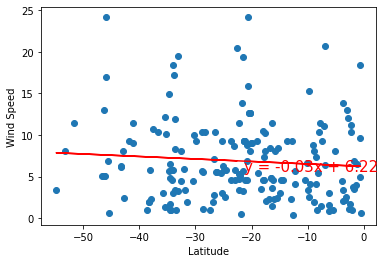

None


In [140]:
xValues = SouthernHemisphere["Latitude"]
yValues = SouthernHemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(plotLinearRegression(xValues, yValues))